In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize']=(18,5)
pd.set_option('display.max_columns', 100)

import nltk
from scipy import stats
import re
from  scipy.stats import ttest_ind
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [2]:
data=pd.read_csv('Data/cleanedData.csv')
data.dropna(subset=['CleanWordList'],inplace=True)
data.head(2)

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,CommentLength,%OfUpperCaseLetters,NoOfURL,AvgLengthOfEachWord,NoOfStopWords,NoOfSentences,NoOfWords,NoOfUniqueWords,AvgSentenceLength,FleschReadingEase,GunningFog,SmogIndex,ARI,ColemanLiauIndex,TextStandard,CleanWordList
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1,56,1.79,0,6.12,18,1,13,13,8.0,88.74,3.2,0.0,11.4,13.01,3.0,huh anyway check tube channel kobyoshi99
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1,166,12.05,0,4.22,44,3,40,31,15.0,81.63,6.0,0.0,7.3,6.49,6.0,hey guy check new channel first vid u monkey '...


In [3]:
cols=['COMMENT_ID','%OfUpperCaseLetters', 'NoOfURL', 'AvgLengthOfEachWord',
       '%OfNoOfStopWords', 'NoOfWords', '%OfNoOfUniqueWords',
       'AvgSentenceLength', 'TextStandard', 'CleanWordList']

X=data.loc[:,cols]
y=data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25 ,random_state=147)

countVectorizer=CountVectorizer(min_df=5,ngram_range=(1,3))

C:\Users\Preeti\Anaconda3\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [4]:
X_train_dtm = countVectorizer.fit_transform(X_train['CleanWordList']) 
X_test_dtm  = countVectorizer.transform(X_test['CleanWordList'])

In [5]:
X_train.head(2)

,COMMENT_ID,%OfUpperCaseLetters,NoOfURL,AvgLengthOfEachWord,%OfNoOfStopWords,NoOfWords,%OfNoOfUniqueWords,AvgSentenceLength,TextStandard,CleanWordList
794,z12ldxsqzsvvwf5h404cjh5ooxincztrles,1.32,0,3.53,NaN,18,NaN,17.0,6.0,anyone else think video theme bit insult 99 da...
210,z12kyn0qjzzzur2ai04cg5szenjxdrorp4w,4.44,1,10.38,NaN,13,NaN,8.0,9.0,please friend read book repass


In [6]:
colName=countVectorizer.get_feature_names()

X_train_df=pd.DataFrame(X_train_dtm.toarray(),columns=colName)
X_test_df=pd.DataFrame(X_test_dtm.toarray(),columns=colName)

In [7]:
#Initialize clasifier
clf=MultinomialNB()
clf.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [8]:
predict = clf.predict(X_test_df)

In [9]:
print("Vocab size:",len(countVectorizer.get_feature_names()))

Vocab size: 730


# Most Frequent words in the dataset.

In [10]:
# The below code counts occurance of each word only instead of word and phrases
# wordFreqDict={}
# for wordlist in data['CleanWordList']:
#     for word in wordlist.split(' '):
#         if word not in wordFreqDict:
#             wordFreqDict[word]=1
#         else:
#             wordFreqDict[word]+=1


# df=pd.DataFrame.from_dict(wordFreqDict,orient='index',columns=['wordFrequency'])
# df.head(2)

# df.sort_values(by=['wordFrequency'],ascending=False).head()

# df.reset_index(inplace=True)

# df.rename(columns={'index':'word'},inplace=True)

# df.sort_values(by='wordFrequency',ascending=False,inplace=True)

# df_linechart=df.head(30)

# df_linechart.reset_index(drop=True, inplace=True)
# df_linechart.head(30)

# sns.lineplot(x=df['word'].head(15),y=df['wordFrequency'].head(15),sort=False)
# plt.title('Most frequent words in training data')
# plt.xticks(rotation=45);

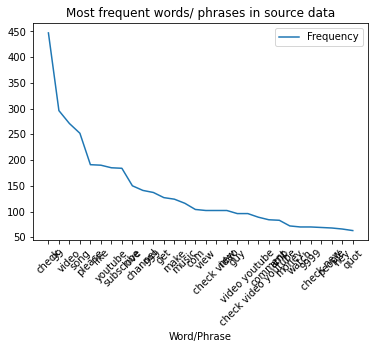

In [11]:
data_cv = countVectorizer.fit_transform(X_train['CleanWordList']) 
data_cv=pd.DataFrame(data_cv.toarray(),columns=colName)

mostFrequentWords=pd.melt(data_cv,value_name='Frequency',var_name='Word/Phrase')
mostFrequentWords=mostFrequentWords.groupby('Word/Phrase').sum().sort_values(by=['Frequency'],ascending=False)

# List of top 30 most frequent words
mostFrequentWords_30=mostFrequentWords.head(30)

# Plot a line chart
sns.lineplot(data=mostFrequentWords_30,sort=False);
plt.title('Most frequent words/ phrases in source data')
plt.xticks(rotation=45);

# Most predictive words

## Most predictive words/phrases for Spam comments

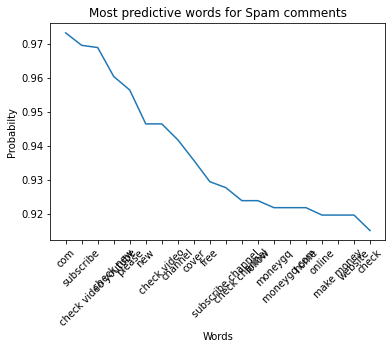

In [12]:
words = np.array(countVectorizer.get_feature_names())
x = np.eye(X_test_df.shape[1])
probs = clf.predict_log_proba(x)[:, 0]
ind = np.argsort(probs)

# Top 20 most predictive words for spam and ham 
predictors_of_SPAM = words[ind[:20]]
predictors_of_HAM = words[ind[-20:]]

SPAM_prob = probs[ind[:20]]
HAM_prob = probs[ind[-20:]]

df_spamPredictors=pd.DataFrame(zip(predictors_of_SPAM,(1 - np.exp(SPAM_prob))),
             columns=['Most predictive words for Spam comments','Probabilty'])


sns.lineplot(x='Most predictive words for Spam comments',y='Probabilty',data=df_spamPredictors,sort=False)
plt.title("Most predictive words for Spam comments")
plt.xlabel("Words")
plt.xticks(rotation=45);

### SPAM Comments related to making free money from home

In [13]:
filt=(X_test_df['moneygq']==1) | (X_test_df['moneygq com']==1) | (X_test_df['make money']==1 | (X_test_df['free']==1) | (X_test_df['home']==1))
moneyCommentId=X_test_df[filt].index.tolist()

X_test_temp=X_test.reset_index()
X_test_temp['Prediction']=pd.DataFrame(predict)

# Printing list of comments with Money related words and predicted as SPAM
for id in moneyCommentId:
    commentID=X_test_temp.loc[(X_test_temp.index==id) & (X_test_temp['Prediction']==1),'COMMENT_ID'].iloc[0]
    print(data[data['COMMENT_ID']==commentID].CONTENT.iloc[0])
    print('------------------------------------------------------------------------------------------------------------------')

visit &quot; ww estiloproduction com &quot; best website to make money
------------------------------------------------------------------------------------------------------------------
Hello Guys...I Found a Way to Make Money Online You Can Get Paid To Mess Around On Facebook And Twitter! GET PAID UPTO $25 to $35 AN HOUR...Only at 4NetJobs.com Work from the Comfort of your Home... They are Currently Hiring People from all Over the World, For a Wide Range of Social Media Jobs on Sites such as Facebook,Twitter and YouTube You don&#39;t Need any Prior Skills or Experience and You can Begin Work Immediately! You Can Easily Make $4000 to $5000+ Monthly Income…Only at 4NetJobs.com
------------------------------------------------------------------------------------------------------------------
You guys should check out this EXTRAORDINARY website called ZONEPA.COM .   You can make money online and start working from home today as I am!   I am making over $3,000+ per month at ZONEPA.COM !   V

## Most predictive words/phrases for Ham comments

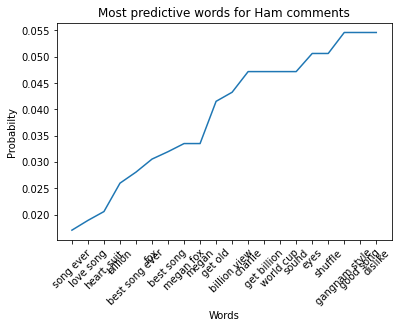

In [14]:
df_hamPredictors=pd.DataFrame(zip(predictors_of_HAM,(1 - np.exp(HAM_prob))),
             columns=['Most predictive words for Ham comments','Probabilty'])

df_hamPredictors.sort_values(by=['Probabilty'], ascending=True, inplace=True)
sns.lineplot(x='Most predictive words for Ham comments',y='Probabilty',data=df_hamPredictors,sort=False)
plt.title("Most predictive words for Ham comments")
plt.xlabel("Words")
plt.xticks(rotation=45);

# Word Cloud


In [33]:
df=pd.DataFrame(data={'words':words,'probability':(1 - np.exp(probs))})
df.sort_values(by='probability',inplace=True)

filtHam=df['probability']<0.5
filtSpam=df['probability']>=0.5


In [44]:
from PIL import Image
maskHamImage=np.array(Image.open('Image/ham.jpg'))
maskSpamImage=np.array(Image.open('Image/Spam.jpg'))

wcHam = WordCloud(background_color='black',mask=maskHamImage).generate_from_text(' '.join(df.loc[filtHam,'words']))
wcSpam = WordCloud(background_color='black',mask=maskSpamImage).generate_from_text(' '.join(df.loc[filtSpam,'words']))

wcSpam.recolor(color_func=grey_color_func)
wcHam.recolor(color_func=grey_color_func)

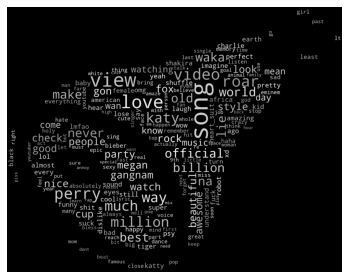

In [54]:
fig=plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.axis('off')
plt.imshow(wcHam);

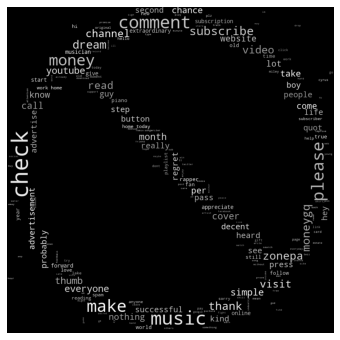

In [55]:
fig=plt.figure()
fig.set_figwidth(6)
fig.set_figheight(6)
plt.axis('off')
plt.imshow(wcSpam);